<a href="https://colab.research.google.com/github/Soob00/20251R0136COSE47101/blob/dataset1_decisionTree/notebooks/dataset1_decisiontree_all_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import shap


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv("/content/processed_all_dataset2.csv")
df

,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Country_Brazil,Country_Canada,...,Gender_Male,Gender_Other,Diet Type_Junk Food,Diet Type_Keto,Diet Type_Vegan,Diet Type_Vegetarian,Mental Health Condition_Bipolar,Mental Health Condition_Depression,Mental Health Condition_None,Mental Health Condition_PTSD
0,0.652174,1,-0.117319,1,0.025641,0.333333,0.755556,0.611111,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0.282609,2,-1.050891,1,0.717949,0.533333,0.800000,0.644444,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0.413043,1,0.482835,3,0.589744,0.450000,0.955556,0.966667,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0.369565,1,0.482835,1,0.589744,0.033333,0.800000,0.622222,1,0,...,1,0,0,0,1,0,0,1,0,0
4,0.608696,1,0.549519,1,0.384615,0.266667,0.411111,0.377778,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.847826,2,0.349467,3,0.230769,0.400000,0.966667,0.544444,0,0,...,0,0,0,0,0,0,0,1,0,0
2996,0.195652,1,0.416151,1,0.692308,0.900000,0.588889,0.988889,0,0,...,1,0,1,0,0,0,0,0,1,0
2997,0.521739,2,-0.317370,3,0.076923,0.316667,0.466667,0.344444,0,0,...,1,0,0,0,0,0,0,1,0,0
2998,0.152174,3,-0.517421,1,0.794872,0.383333,0.544444,0.344444,0,0,...,1,0,0,1,0,0,0,0,0,0


In [ ]:

Y = df['Happiness Score'] #타겟변수
X = df.drop(columns=['Happiness Score'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Best max_depth: 2
Test MSE: 0.0838
Test R^2 Score: -0.0026


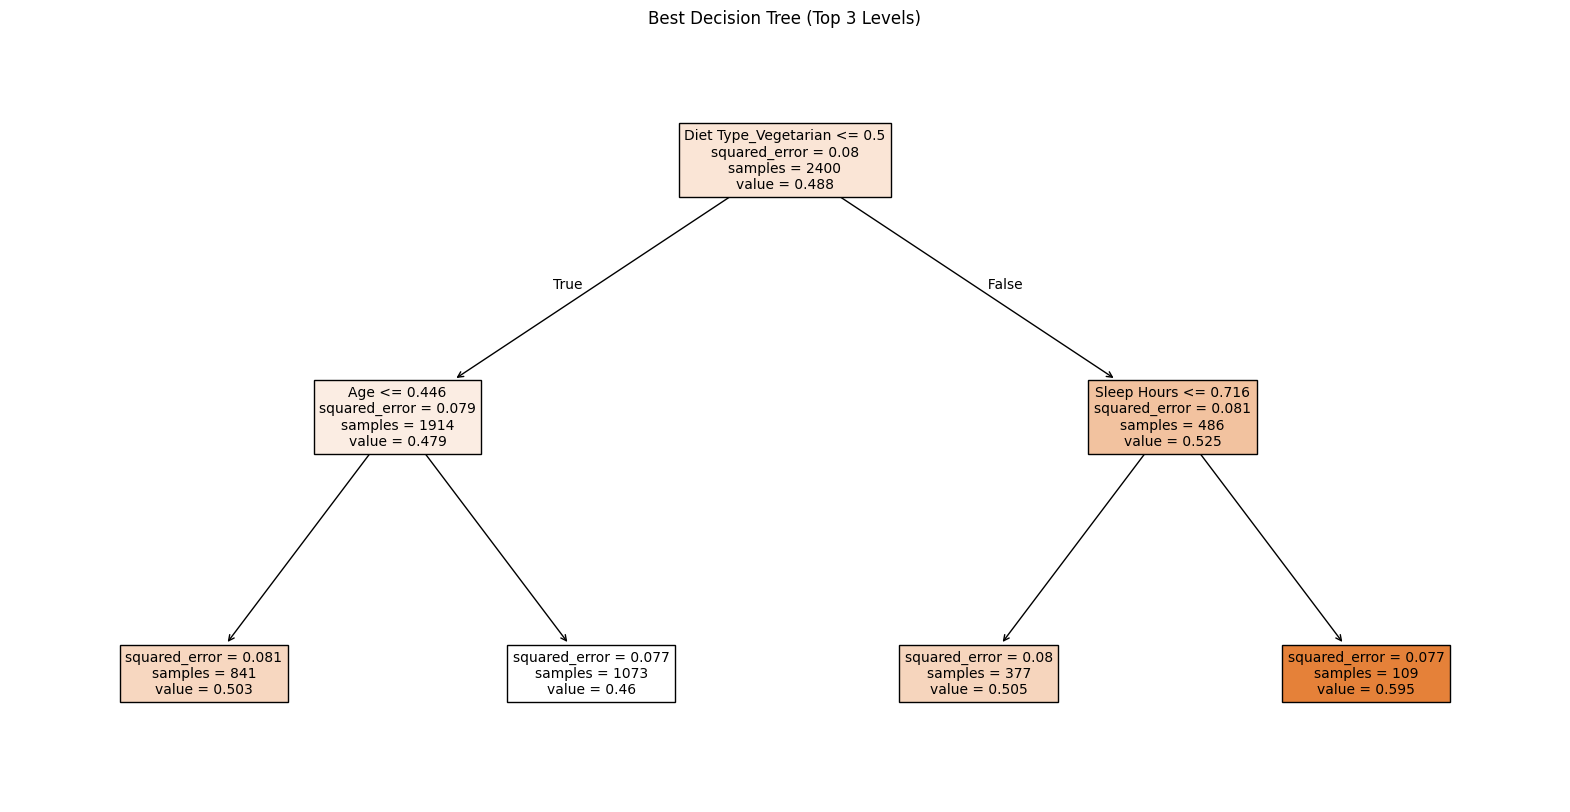


Decision Tree Rules:

|--- Diet Type_Vegetarian <= 0.50
|   |--- Age <= 0.45
|   |   |--- value: [0.50]
|   |--- Age >  0.45
|   |   |--- value: [0.46]
|--- Diet Type_Vegetarian >  0.50
|   |--- Sleep Hours <= 0.72
|   |   |--- value: [0.50]
|   |--- Sleep Hours >  0.72
|   |   |--- value: [0.60]



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

# 이미 grid_search.fit(X_train, Y_train) 후 최적 모델(best_model)을 얻었으니

# 예측
Y_pred = best_model.predict(X_test)

# 평가 출력
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2 Score: {r2:.4f}")


# 트리 시각화 (최대 3단계)
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Best Decision Tree (Top 3 Levels)")
plt.show()

# 규칙 텍스트 출력
rules = export_text(best_model, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(rules)


In [ ]:
r2 = r2_score(Y_test, Y_pred)
r2

-0.0025978226461189635

In [ ]:


# 랜덤 포레스트 파라미터 후보 정의
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV 객체 생성
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# 학습
rf_grid.fit(X_train, Y_train)

# 최적 모델로 예측
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)

# 성능 평가
print("Best Random Forest Params:", rf_grid.best_params_)
print("R²:", r2_score(Y_test, rf_pred))

🌲 Best Random Forest Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
R²: 0.0048194480561749575


In [ ]:
# XGBoost 파라미터 후보 정의
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# GridSearchCV 객체 생성
xgb_grid = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=xgb_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# 학습
xgb_grid.fit(X_train, Y_train)

# 최적 모델로 예측
xgb_best = xgb_grid.best_estimator_
xgb_pred = xgb_best.predict(X_test)

# 성능 평가
print("\n Best XGBoost Params:", xgb_grid.best_params_)
print("R²:", r2_score(Y_test, xgb_pred))


⚡ Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
R²: -0.00038797629699205416


<ipython-input-17-8e4a845a1f7b>:12: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


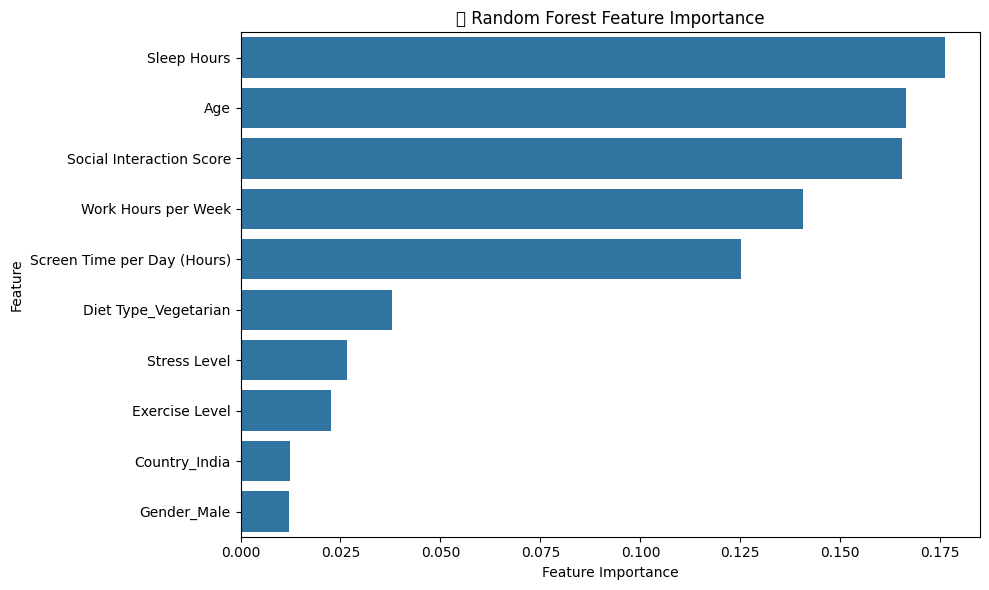

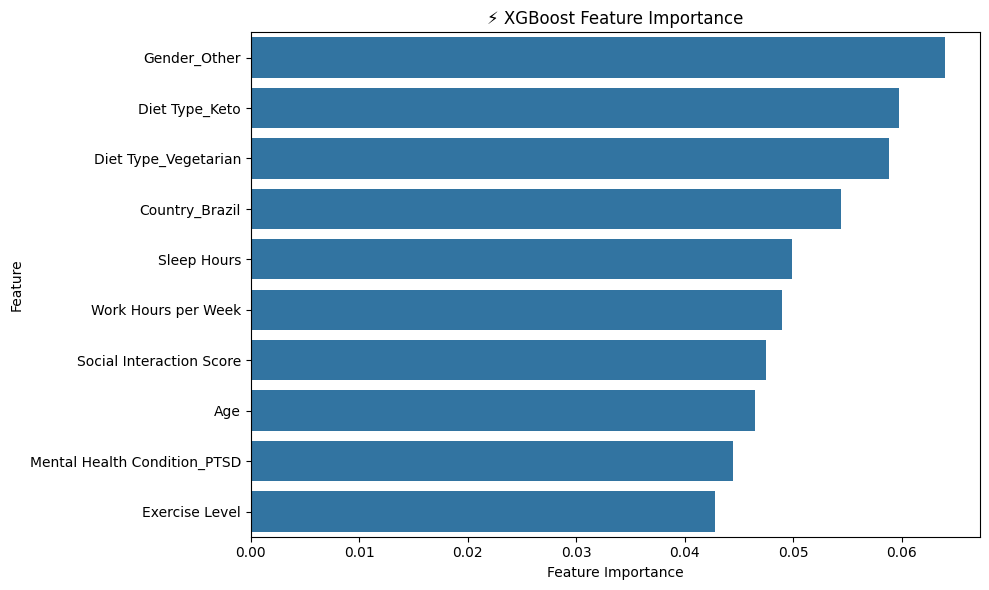

In [ ]:
# Feature importance 시각화 함수
def plot_feature_importance(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_n = 10  # 상위 N개 변수만 시각화

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices][:top_n], y=np.array(feature_names)[indices][:top_n])
    plt.title(title)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# 랜덤포레스트 중요도
plot_feature_importance(rf_best, X.columns, "Random Forest Feature Importance")

# XGBoost 중요도
plot_feature_importance(xgb_best, X.columns, "XGBoost Feature Importance")

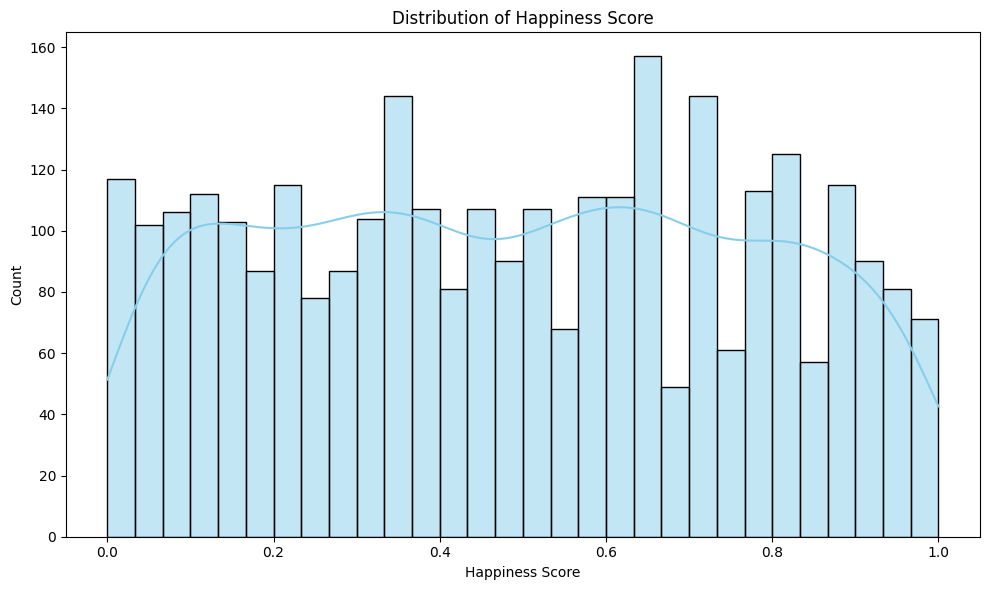

In [ ]:


plt.figure(figsize=(10,6))
sns.histplot(df['Happiness Score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Happiness_Level
Low     1011
Mid     1003
High     986
Name: count, dtype: int64


<ipython-input-21-5dca1b706a3c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Happiness_Level', palette='Set2')


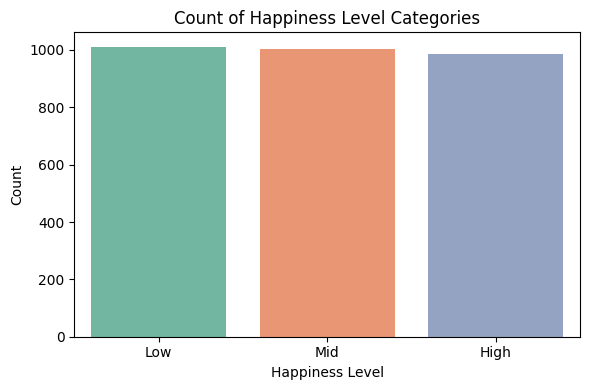

In [ ]:


# 기존 점수 가져오기
score = df['Happiness Score']

# 분위수를 기준으로 세 구간 나누기
df['Happiness_Level'] = pd.qcut(score, q=3, labels=['Low', 'Mid', 'High'])

# 분포 확인
print(df['Happiness_Level'].value_counts())



plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Happiness_Level', palette='Set2')
plt.title("Count of Happiness Level Categories")
plt.xlabel("Happiness Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


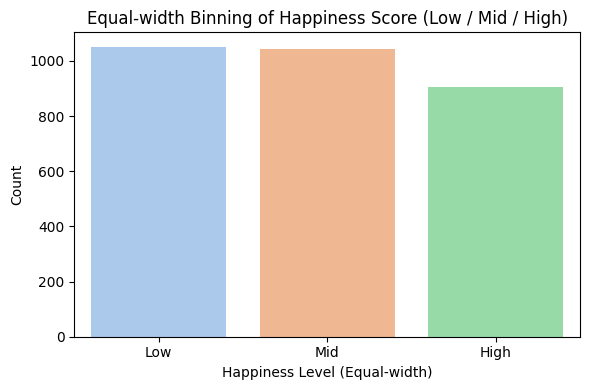

In [ ]:
min_val = df['Happiness Score'].min()
max_val = df['Happiness Score'].max()

bins = np.linspace(min_val, max_val, 4)  # 3구간 (Low, Mid, High)
labels = ['Low', 'Mid', 'High']

df['Happiness_Level_fixed'] = pd.cut(df['Happiness Score'], bins=bins, labels=labels, include_lowest=True)



plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Happiness_Level_fixed', hue='Happiness_Level_fixed', palette='pastel', legend=False)
plt.title("Equal-width Binning of Happiness Score (Low / Mid / High)")
plt.xlabel("Happiness Level (Equal-width)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


📘 [qcut] Best max_depth: 5
📘 [qcut] Decision Tree (Happiness_Level) Report
              precision    recall  f1-score   support

        High       0.35      0.35      0.35       196
         Low       0.35      0.57      0.44       202
         Mid       0.28      0.11      0.16       202

    accuracy                           0.34       600
   macro avg       0.33      0.34      0.31       600
weighted avg       0.33      0.34      0.31       600

Accuracy: 0.3433333333333333
Confusion Matrix:
 [[ 68 102  26]
 [ 55 116  31]
 [ 71 109  22]]


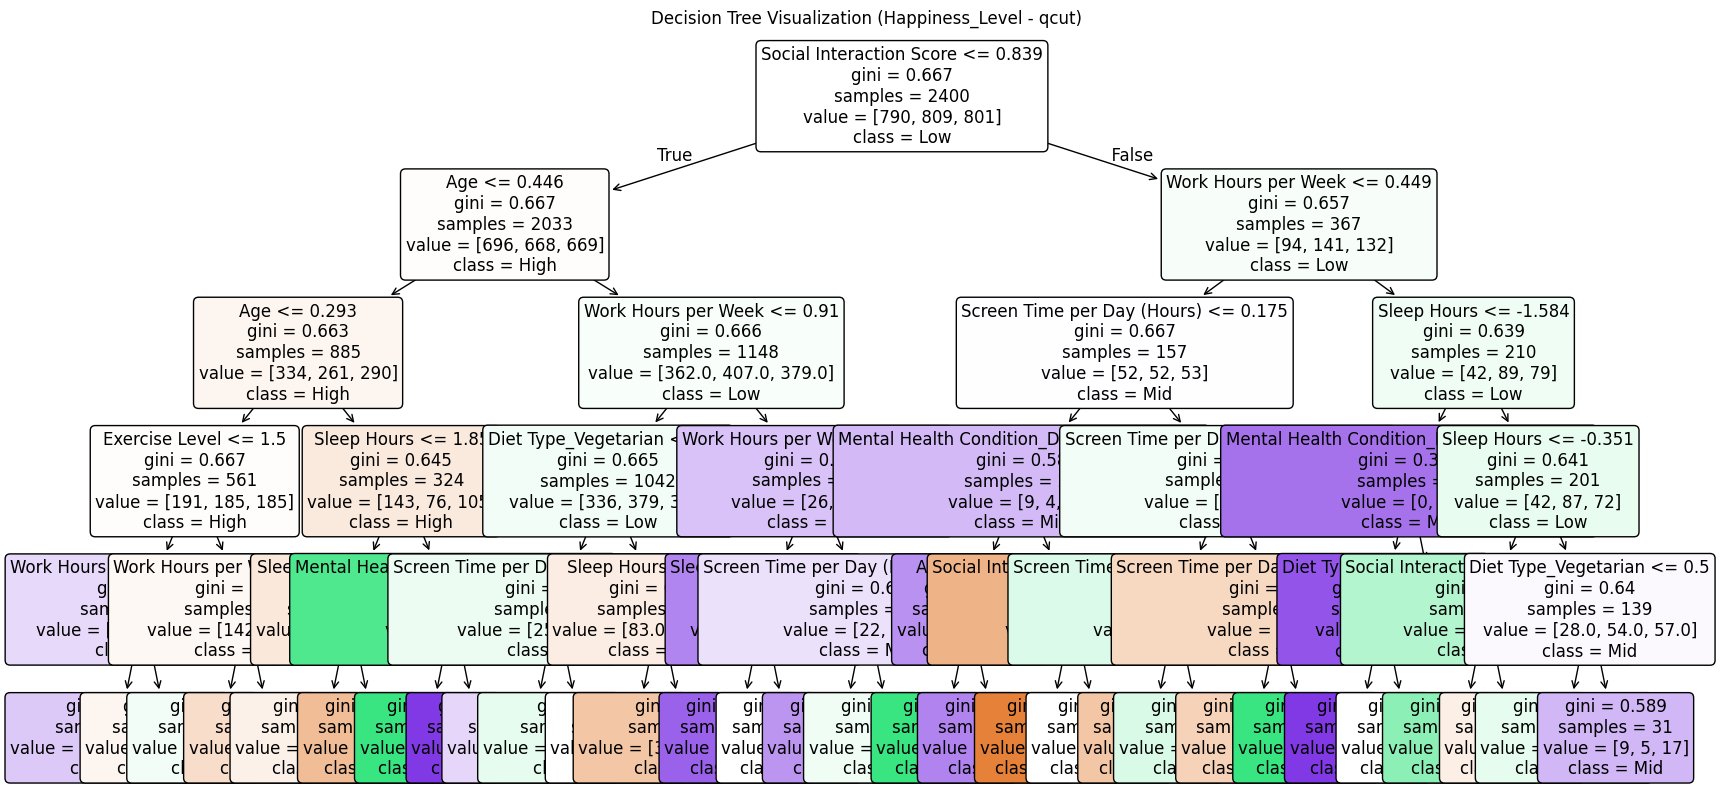

📘 [qcut] Decision Tree Rules:

|--- Social Interaction Score <= 0.84
|   |--- Age <= 0.45
|   |   |--- Age <= 0.29
|   |   |   |--- Exercise Level <= 1.50
|   |   |   |   |--- Work Hours per Week <= 0.60
|   |   |   |   |   |--- class: Mid
|   |   |   |   |--- Work Hours per Week >  0.60
|   |   |   |   |   |--- class: High
|   |   |   |--- Exercise Level >  1.50
|   |   |   |   |--- Work Hours per Week <= 0.73
|   |   |   |   |   |--- class: Low
|   |   |   |   |--- Work Hours per Week >  0.73
|   |   |   |   |   |--- class: High
|   |   |--- Age >  0.29
|   |   |   |--- Sleep Hours <= 1.85
|   |   |   |   |--- Sleep Hours <= 0.98
|   |   |   |   |   |--- class: High
|   |   |   |   |--- Sleep Hours >  0.98
|   |   |   |   |   |--- class: High
|   |   |   |--- Sleep Hours >  1.85
|   |   |   |   |--- Mental Health Condition_None <= 0.50
|   |   |   |   |   |--- class: Low
|   |   |   |   |--- Mental Health Condition_None >  0.50
|   |   |   |   |   |--- class: Mid
|   |--- Age >  0.45

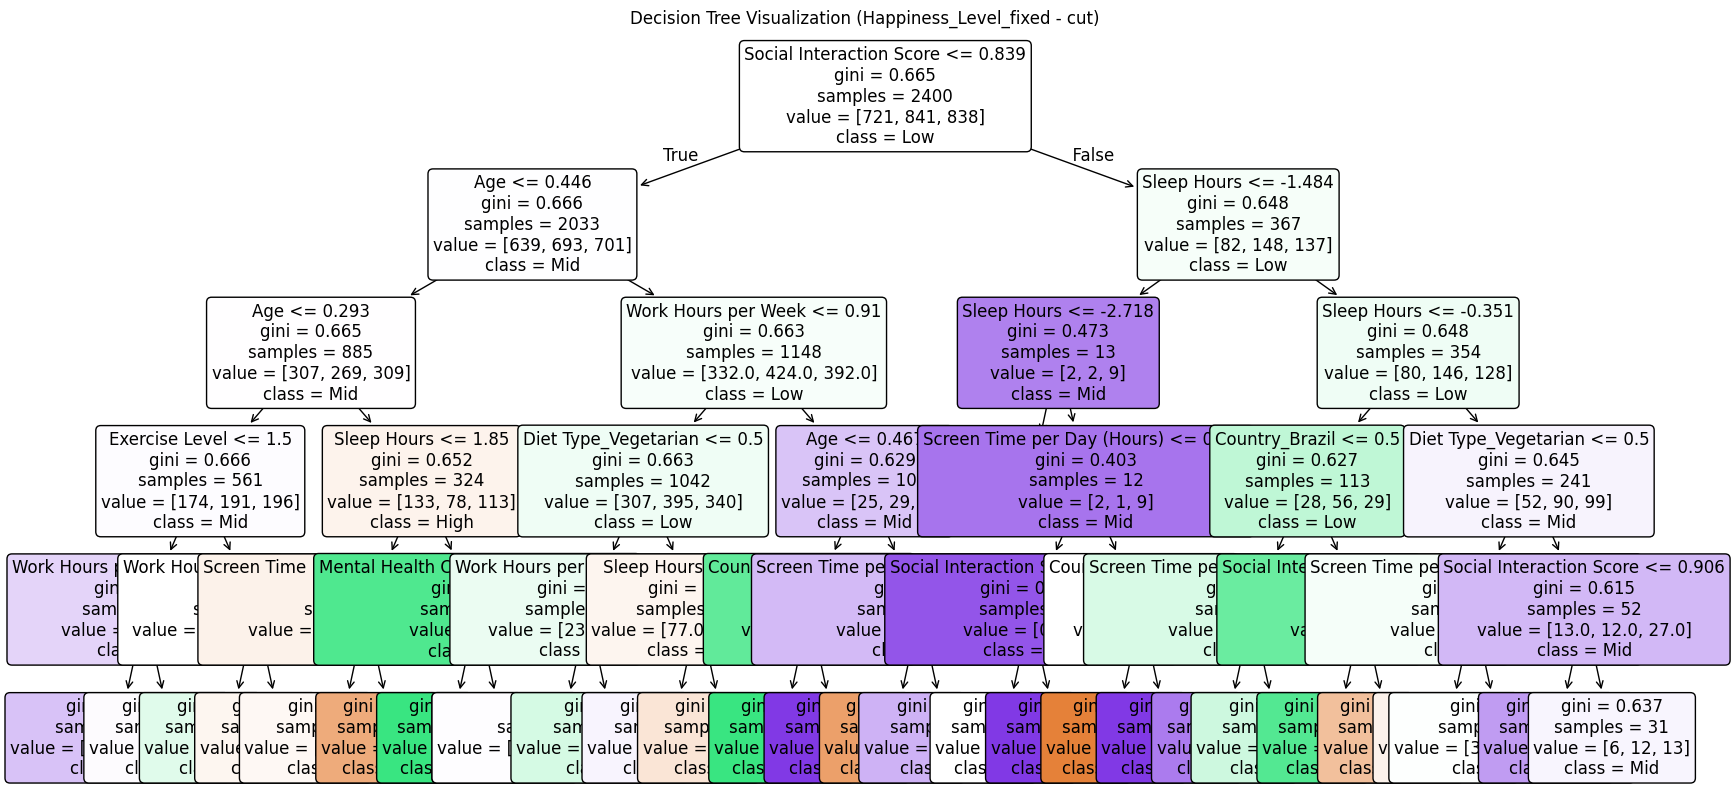


📗 [cut] Decision Tree Rules:

|--- Social Interaction Score <= 0.84
|   |--- Age <= 0.45
|   |   |--- Age <= 0.29
|   |   |   |--- Exercise Level <= 1.50
|   |   |   |   |--- Work Hours per Week <= 0.60
|   |   |   |   |   |--- class: Mid
|   |   |   |   |--- Work Hours per Week >  0.60
|   |   |   |   |   |--- class: Mid
|   |   |   |--- Exercise Level >  1.50
|   |   |   |   |--- Work Hours per Week <= 0.58
|   |   |   |   |   |--- class: Low
|   |   |   |   |--- Work Hours per Week >  0.58
|   |   |   |   |   |--- class: High
|   |   |--- Age >  0.29
|   |   |   |--- Sleep Hours <= 1.85
|   |   |   |   |--- Screen Time per Day (Hours) <= 0.94
|   |   |   |   |   |--- class: High
|   |   |   |   |--- Screen Time per Day (Hours) >  0.94
|   |   |   |   |   |--- class: High
|   |   |   |--- Sleep Hours >  1.85
|   |   |   |   |--- Mental Health Condition_None <= 0.50
|   |   |   |   |   |--- class: Low
|   |   |   |   |--- Mental Health Condition_None >  0.50
|   |   |   |   |   |--- 

In [ ]:
# 특성과 타겟
X = df.drop(columns=['Happiness Score', 'Happiness_Level', 'Happiness_Level_fixed'])  # 공통 X

# 모델1: Y = Happiness_Level (qcut 버전)
Y_qcut = df['Happiness_Level']
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X, Y_qcut, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝 (qcut)
param_grid = {'max_depth': range(2, 11)}
grid_q = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_q.fit(X_train_q, y_train_q)
best_tree_q = grid_q.best_estimator_

print(f"📘 [qcut] Best max_depth: {grid_q.best_params_['max_depth']}")  # 최적 max_depth 출력

# 평가 (qcut)
y_pred_q = best_tree_q.predict(X_test_q)
print("📘 [qcut] Decision Tree (Happiness_Level) Report")
print(classification_report(y_test_q, y_pred_q))
print("Accuracy:", accuracy_score(y_test_q, y_pred_q))
print("Confusion Matrix:\n", confusion_matrix(y_test_q, y_pred_q))

# --- 모델1: qcut 버전 트리 시각화 ---
plt.figure(figsize=(20,10))
plot_tree(best_tree_q, feature_names=X.columns, class_names=best_tree_q.classes_.astype(str),
          filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree Visualization (Happiness_Level - qcut)')
plt.show()

# 규칙 추출 (qcut)
rules_q = export_text(best_tree_q, feature_names=list(X.columns))
print("📘 [qcut] Decision Tree Rules:\n")
print(rules_q)


# 모델2: Y = Happiness_Level_fixed (cut 버전)
Y_cut = df['Happiness_Level_fixed']
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, Y_cut, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝 (cut)
grid_f = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_f.fit(X_train_f, y_train_f)
best_tree_f = grid_f.best_estimator_

print(f"\n📗 [cut] Best max_depth: {grid_f.best_params_['max_depth']}")  # 최적 max_depth 출력

# 평가 (cut)
y_pred_f = best_tree_f.predict(X_test_f)
print("\n📗 [cut] Decision Tree (Happiness_Level_fixed) Report")
print(classification_report(y_test_f, y_pred_f))
print("Accuracy:", accuracy_score(y_test_f, y_pred_f))
print("Confusion Matrix:\n", confusion_matrix(y_test_f, y_pred_f))


# --- 모델2: cut 버전 트리 시각화 ---
plt.figure(figsize=(20,10))
plot_tree(best_tree_f, feature_names=X.columns, class_names=best_tree_f.classes_.astype(str),
          filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree Visualization (Happiness_Level_fixed - cut)')
plt.show()

# 규칙 추출 (cut)
rules_f = export_text(best_tree_f, feature_names=list(X.columns))
print("\n📗 [cut] Decision Tree Rules:\n")
print(rules_f)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 특성과 타겟
X = df.drop(columns=['Happiness Score', 'Happiness_Level', 'Happiness_Level_fixed'])

# --- 모델1: Y = Happiness_Level (qcut) ---
Y_qcut = df['Happiness_Level']
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(
    X, Y_qcut, test_size=0.2, random_state=42
)

# --- 모델2: Y = Happiness_Level_fixed (cut) ---
Y_cut = df['Happiness_Level_fixed']
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X, Y_cut, test_size=0.2, random_state=42
)

# 축소된 하이퍼파라미터 그리드
param_grid_small = {
    'max_depth': range(5, 9),             # 5,6,7,8
    'min_samples_split': [2, 5],          # 2,5
    'min_samples_leaf': [1, 2],           # 1,2
    'max_features': ['sqrt', 'log2']      # sqrt, log2
}

# XGBoost용 그리드
xgb_grid_small = {
    'max_depth': range(5, 9),
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'colsample_bytree': [0.8, 1.0]
}

# LabelEncoder 인스턴스는 함수 밖에서 하나만 생성
le = LabelEncoder()

def train_and_eval(model, grid, X_tr, y_tr, X_te, y_te, name, cv=3):
    print(f"\n===== {name} =====")
    # XGBoost는 레이블을 숫자로 변환
    if isinstance(model, XGBClassifier):
        y_tr_enc = le.fit_transform(y_tr)
        y_te_enc = le.transform(y_te)
        gs = GridSearchCV(model, grid, cv=cv, n_jobs=-1, verbose=1)
        gs.fit(X_tr, y_tr_enc)
        best = gs.best_estimator_
        y_pred_enc = best.predict(X_te)
        y_pred = le.inverse_transform(y_pred_enc)
    else:
        gs = GridSearchCV(model, grid, cv=cv, n_jobs=-1, verbose=1)
        gs.fit(X_tr, y_tr)
        best = gs.best_estimator_
        y_pred = best.predict(X_te)

    print(f"Best params: {gs.best_params_}")
    print(classification_report(y_te, y_pred))
    print("Accuracy:", accuracy_score(y_te, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))

    return best

# 1) Decision Tree (qcut)
dt_q = train_and_eval(
    DecisionTreeClassifier(random_state=42),
    param_grid_small,
    X_train_q, y_train_q, X_test_q, y_test_q,
    "Decision Tree (qcut)"
)

# 2) Random Forest (qcut)
rf_q = train_and_eval(
    RandomForestClassifier(random_state=42),
    param_grid_small,
    X_train_q, y_train_q, X_test_q, y_test_q,
    "Random Forest (qcut)"
)

# 3) Gradient Boosting (qcut)
gb_q = train_and_eval(
    GradientBoostingClassifier(random_state=42),
    param_grid_small,
    X_train_q, y_train_q, X_test_q, y_test_q,
    "Gradient Boosting (qcut)"
)

# 4) XGBoost (qcut)
xgb_q = train_and_eval(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    xgb_grid_small,
    X_train_q, y_train_q, X_test_q, y_test_q,
    "XGBoost (qcut)"
)

# 5) Decision Tree (cut)
dt_f = train_and_eval(
    DecisionTreeClassifier(random_state=42),
    param_grid_small,
    X_train_f, y_train_f, X_test_f, y_test_f,
    "Decision Tree (cut)"
)

# 6) Random Forest (cut)
rf_f = train_and_eval(
    RandomForestClassifier(random_state=42),
    param_grid_small,
    X_train_f, y_train_f, X_test_f, y_test_f,
    "Random Forest (cut)"
)

# 7) Gradient Boosting (cut)
gb_f = train_and_eval(
    GradientBoostingClassifier(random_state=42),
    param_grid_small,
    X_train_f, y_train_f, X_test_f, y_test_f,
    "Gradient Boosting (cut)"
)

# 8) XGBoost (cut)
xgb_f = train_and_eval(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    xgb_grid_small,
    X_train_f, y_train_f, X_test_f, y_test_f,
    "XGBoost (cut)"
)



===== Decision Tree (qcut) =====
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best params: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
              precision    recall  f1-score   support

        High       0.34      0.50      0.41       196
         Low       0.34      0.32      0.33       202
         Mid       0.34      0.21      0.26       202

    accuracy                           0.34       600
   macro avg       0.34      0.34      0.33       600
weighted avg       0.34      0.34      0.33       600

Accuracy: 0.3416666666666667
Confusion Matrix:
 [[98 57 41]
 [96 65 41]
 [91 69 42]]

===== Random Forest (qcut) =====
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best params: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
              precision    recall  f1-score   support

        High       0.34      0.26      0.29       196
         Low       0.33      0.36

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:12:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params: {'colsample_bytree': 0.8, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

        High       0.35      0.34      0.34       196
         Low       0.30      0.32      0.31       202
         Mid       0.34      0.32      0.33       202

    accuracy                           0.33       600
   macro avg       0.33      0.33      0.33       600
weighted avg       0.33      0.33      0.33       600

Accuracy: 0.32666666666666666
Confusion Matrix:
 [[66 75 55]
 [63 65 74]
 [61 76 65]]

===== Decision Tree (cut) =====
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

        High       0.31      0.15      0.20       185
         Low       0.31      0.37      0.34       210
         Mid       0.29      0.37      0.32       205

    accuracy      

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:16:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params: {'colsample_bytree': 1.0, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

        High       0.36      0.29      0.32       185
         Low       0.37      0.37      0.37       210
         Mid       0.33      0.40      0.36       205

    accuracy                           0.35       600
   macro avg       0.36      0.35      0.35       600
weighted avg       0.36      0.35      0.35       600

Accuracy: 0.35333333333333333
Confusion Matrix:
 [[54 53 78]
 [48 77 85]
 [47 77 81]]


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

# ——————————————————————————————————————————
# 1) CatBoost용 하이퍼파라미터 그리드
param_grid_cb = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 5, 10],
    'colsample_bylevel': [0.7, 1.0],
    'iterations': [100, 200]
}

# 2) 평가 함수 (CatBoost 전용, 레이블 인코딩 불필요)
def train_and_eval_cb(X_tr, y_tr, X_te, y_te, name, cv=3):
    print(f"\n===== {name} (CatBoost) =====")
    model = CatBoostClassifier(
        random_seed=42,
        verbose=False
    )
    gs = GridSearchCV(model, param_grid_cb, cv=cv, n_jobs=-1, verbose=1)
    gs.fit(X_tr, y_tr)
    best = gs.best_estimator_

    y_pred = best.predict(X_te)
    print(f"Best params: {gs.best_params_}")
    print(classification_report(y_te, y_pred))
    print("Accuracy:", accuracy_score(y_te, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))

    return best

# ——————————————————————————————————————————
# 3) qcut 모델 학습·평가
cb_q = train_and_eval_cb(
    X_train_q, y_train_q,
    X_test_q,  y_test_q,
    "Happiness_Level (qcut)"
)

# 4) cut 모델 학습·평가
cb_f = train_and_eval_cb(
    X_train_f, y_train_f,
    X_test_f,  y_test_f,
    "Happiness_Level_fixed (cut)"
)



===== Happiness_Level (qcut) (CatBoost) =====
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best params: {'colsample_bylevel': 0.7, 'depth': 8, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
              precision    recall  f1-score   support

        High       0.37      0.37      0.37       196
         Low       0.35      0.36      0.35       202
         Mid       0.30      0.29      0.30       202

    accuracy                           0.34       600
   macro avg       0.34      0.34      0.34       600
weighted avg       0.34      0.34      0.34       600

Accuracy: 0.34
Confusion Matrix:
 [[72 62 62]
 [55 73 74]
 [68 75 59]]

===== Happiness_Level_fixed (cut) (CatBoost) =====
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best params: {'colsample_bylevel': 0.7, 'depth': 4, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
              precision    recall  f1-score   support

        High       0.50      0.01      0.01    